## The Data
https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/kc_house_data.csv')

# Exploratory Data Analysis

In [3]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

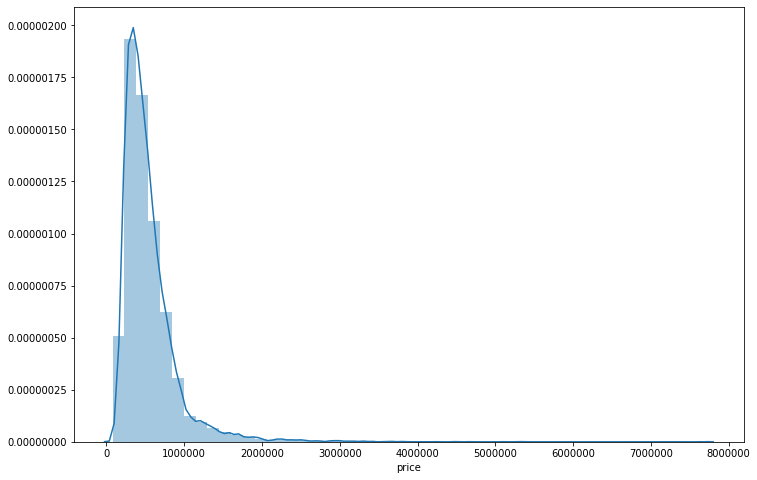

In [5]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'])

#might drop outliers (more than $2M) later on
#most houses fall under $0 - $1.5M range

In [5]:
df.corr()['price'].sort_values()
#observe how correlation btwn price and sqft_living is very high.

/var/folders/b5/89nc1ktx2q3811mbrt9q9lrh0000gn/T/ipykernel_23084/321850276.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values()


zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='sqft_living'>

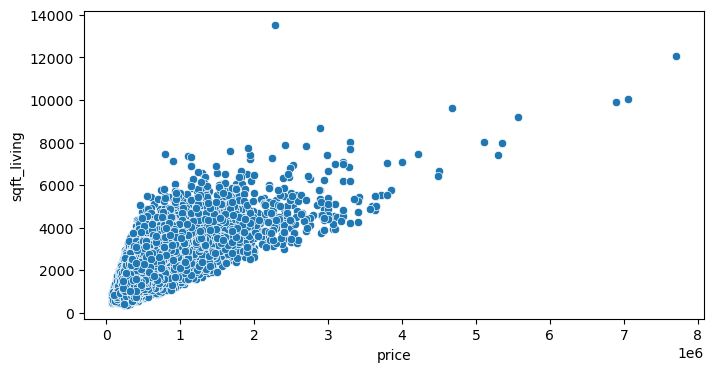

In [9]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='price',y='sqft_living',data=df)

### Geographical Properties

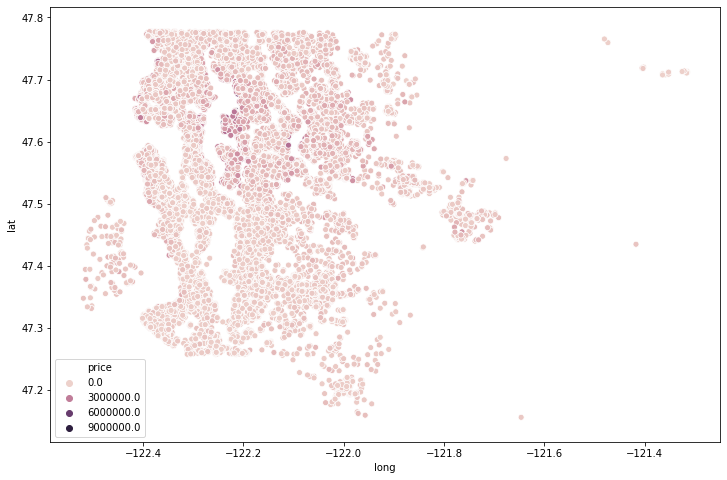

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')
#outliers are clearly affecting data so cleanup is next - look at legend vs plot

In [13]:
#maybe we can sample out top 1%
len(df)*(0.01)

215.97

In [14]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

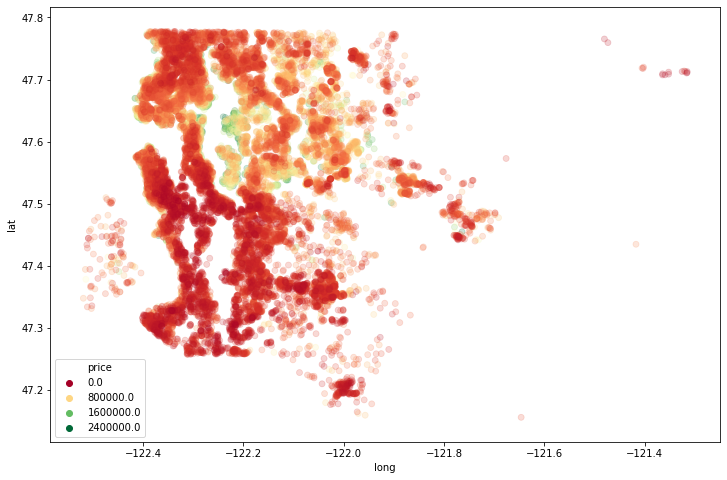

In [15]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=non_top_1_perc,hue='price',
                palette='RdYlGn',edgecolor=None,alpha=0.2)
#color distribution is alot more clear now :D ! 

### Other Features

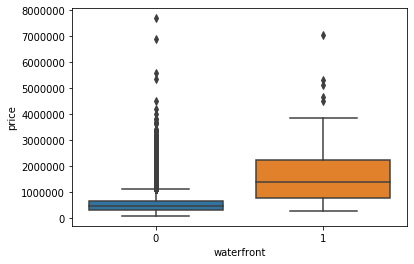

In [16]:
sns.boxplot(x='waterfront',y='price',data=df)
#if on waterfront, more likely to be expensive

## Working with Feature Data

In [17]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [19]:
df = df.drop('id',axis=1)

### Feature Engineering from Date

In [21]:
df['date'] = pd.to_datetime(df['date'])

In [22]:
df['month'] = df['date'].apply(lambda date:date.month)

In [23]:
df['year'] = df['date'].apply(lambda date:date.year)

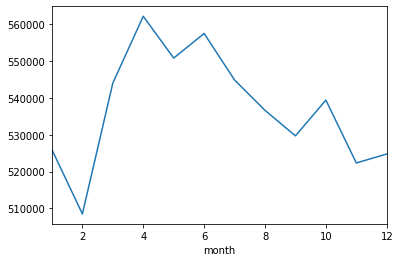

In [26]:
df.groupby('month').mean()['price'].plot()
#might be a diff between the months

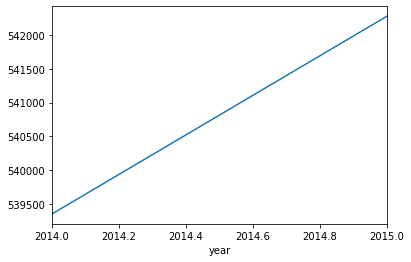

In [27]:
df.groupby('year').mean()['price'].plot()
#inflation

In [28]:
df = df.drop('date',axis=1)

In [30]:
# May be worth considering to remove this or feature engineer categories from it
df['zipcode'].value_counts()

#70 diff zipcodes so i dont think it's worth calling pd.dummies on this, will get rid of it

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [31]:
df = df.drop('zipcode',axis=1)

The other one that may be troublesome is year renovated

In [33]:
# could make sense due to scaling, higher should correlate to more value so will not change this
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

## Scaling and Train Test Split

In [35]:
X = df.drop('price',axis=1)
y = df['price']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### Scaling

scaling post split to only fit to training data and prevent data leakage 

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()

In [40]:
X_train= scaler.fit_transform(X_train)

In [41]:
X_test = scaler.transform(X_test)

In [42]:
X_train.shape

(15117, 19)

In [43]:
X_test.shape

(6480, 19)

## Creating a Model

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [45]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

## Training the Model

In [46]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 1s 74us/sample - loss: 430228839929.3955 - val_loss: 418844493758.2617
Epoch 2/400
15117/15117 [==============================] - 0s 21us/sample - loss: 428253102583.9730 - val_loss: 411996069786.8642
Epoch 3/400
15117/15117 [==============================] - 0s 21us/sample - loss: 401401261499.3472 - val_loss: 351554389222.0839
Epoch 4/400
15117/15117 [==============================] - 0s 22us/sample - loss: 281418027052.1653 - val_loss: 178278463958.2815
Epoch 5/400
15117/15117 [==============================] - 0s 21us/sample - loss: 126127754575.5078 - val_loss: 95946680446.4198
Epoch 6/400
15117/15117 [==============================] - 0s 21us/sample - loss: 97670204498.9794 - val_loss: 93708013133.1160
Epoch 7/400
15117/15117 [==============================] - 0s 21us/sample - loss: 95694764310.6754 - val_loss: 91793937901.0370
Epoch 8/400
15117/15117 [=====================

15117/15117 [==============================] - 0s 21us/sample - loss: 32665666133.9938 - val_loss: 31180875164.1284
Epoch 128/400
15117/15117 [==============================] - 0s 21us/sample - loss: 32611257821.4873 - val_loss: 31133322960.5926
Epoch 129/400
15117/15117 [==============================] - 0s 20us/sample - loss: 32587610780.3061 - val_loss: 31109388368.9086
Epoch 130/400
15117/15117 [==============================] - 0s 21us/sample - loss: 32532602761.3225 - val_loss: 31070066824.5333
Epoch 131/400
15117/15117 [==============================] - 0s 21us/sample - loss: 32522762140.2215 - val_loss: 31049869848.0198
Epoch 132/400
15117/15117 [==============================] - 0s 21us/sample - loss: 32456779739.7600 - val_loss: 30991022889.0864
Epoch 133/400
15117/15117 [==============================] - 0s 21us/sample - loss: 32441568509.6800 - val_loss: 31072597773.2741
Epoch 134/400
15117/15117 [==============================] - 0s 20us/sample - loss: 32410024930.5338 - v

15117/15117 [==============================] - 0s 21us/sample - loss: 30409109880.6250 - val_loss: 28668203351.8617
Epoch 254/400
15117/15117 [==============================] - 0s 21us/sample - loss: 30455913509.4593 - val_loss: 28813098750.1037
Epoch 255/400
15117/15117 [==============================] - 0s 21us/sample - loss: 30437949613.1391 - val_loss: 28386738110.2617
Epoch 256/400
15117/15117 [==============================] - 0s 21us/sample - loss: 30388506209.7040 - val_loss: 28367340799.3679
Epoch 257/400
15117/15117 [==============================] - 0s 20us/sample - loss: 30382620658.2491 - val_loss: 28331952921.9160
Epoch 258/400
15117/15117 [==============================] - 0s 21us/sample - loss: 30362880877.7530 - val_loss: 28368884743.5852
Epoch 259/400
15117/15117 [==============================] - 0s 21us/sample - loss: 30377130940.6004 - val_loss: 28326146690.2123
Epoch 260/400
15117/15117 [==============================] - 0s 21us/sample - loss: 30345498520.2249 - v

15117/15117 [==============================] - 0s 21us/sample - loss: 29184432503.5073 - val_loss: 26707127121.5407
Epoch 380/400
15117/15117 [==============================] - 0s 21us/sample - loss: 29192302663.5317 - val_loss: 26916886057.7185
Epoch 381/400
15117/15117 [==============================] - 0s 21us/sample - loss: 29209242404.8666 - val_loss: 26659705383.1901
Epoch 382/400
15117/15117 [==============================] - 0s 21us/sample - loss: 29177634422.7114 - val_loss: 26732598608.2765
Epoch 383/400
15117/15117 [==============================] - 0s 21us/sample - loss: 29162964032.4191 - val_loss: 26640063419.7333
Epoch 384/400
15117/15117 [==============================] - 0s 21us/sample - loss: 29135119725.1095 - val_loss: 26646387926.9136
Epoch 385/400
15117/15117 [==============================] - 0s 20us/sample - loss: 29150060664.3032 - val_loss: 26652868825.4420
Epoch 386/400
15117/15117 [==============================] - 0s 21us/sample - loss: 29143038606.3521 - v

In [47]:
losses = pd.DataFrame(model.history.history)

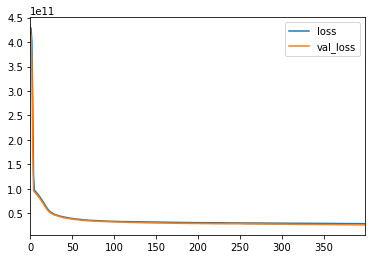

In [48]:
losses.plot()

#couldve continued training without overfitting the data 
#if there were spikes in val_lost it wouldv'e meant that I was overfitting to the training data
#in this case, the bahviour looks really good, both training loss and validation loss have a decreasing trend

# Evaluation on Test Data

In [49]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

#### Predicting on Brand New Data

In [50]:
X_test

array([[0.1       , 0.08      , 0.04239917, ..., 0.00887725, 0.63636364,
        0.        ],
       [0.3       , 0.36      , 0.17269907, ..., 0.00993734, 0.81818182,
        0.        ],
       [0.2       , 0.24      , 0.12512927, ..., 0.00547073, 0.90909091,
        0.        ],
       ...,
       [0.1       , 0.08      , 0.05584281, ..., 0.00506255, 1.        ,
        0.        ],
       [0.3       , 0.2       , 0.22233713, ..., 0.00774485, 0.09090909,
        1.        ],
       [0.3       , 0.32      , 0.27611169, ..., 0.0196531 , 0.45454545,
        0.        ]])

In [51]:
predictions = model.predict(X_test)

In [52]:
mean_absolute_error(y_test,predictions)

101666.74811137635

In [53]:
np.sqrt(mean_squared_error(y_test,predictions))

162549.26352210157

In [54]:
explained_variance_score(y_test,predictions)

0.8009472831860807

In [10]:
df['price'].mean()
#predictions off by like 20%

540296.5735055795

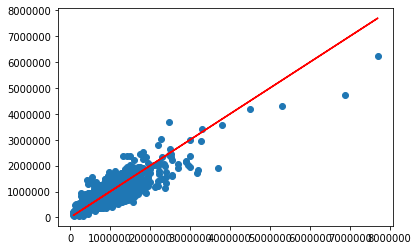

In [57]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

#pretty good at predicting houses priced between $0 - $2M

In [58]:
errors = y_test.values.reshape(6480, 1) - predictions

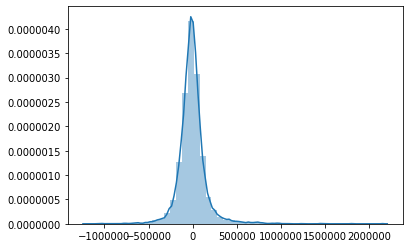

In [59]:
sns.distplot(errors)

-------------
### Predicting on a brand new house

In [81]:
single_house = df.drop('price',axis=1).iloc[0]

In [86]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))
# keep old dimensions

In [87]:
single_house

array([[0.22222222, 0.08      , 0.11392405, 0.00433777, 0.        ,
        0.        , 0.        , 0.5       , 0.375     , 0.11654676,
        0.        , 0.47826087, 0.        , 0.56914119, 0.21760797,
        0.16510319, 0.00574235, 0.81818182, 0.        ]])

In [89]:
model.predict(single_house)
#prediction looks like its over shooting a  possiblely because of extreme higher values, to improve I would drop 1-2% of top values

array([[283862.12]], dtype=float32)

In [90]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64